# **13.5.3 Phân Tích Dữ Liệu FEC 2012 - Kết Hợp Đầy Đủ**

## **Cơ sở dữ liệu của Ủy ban Bầu cử Liên bang Hoa Kỳ năm 2012**

Ủy ban Bầu cử Liên bang Hoa Kỳ (FEC) công bố dữ liệu về các khoản quyên góp cho các chiến dịch chính trị.
Dữ liệu này bao gồm tên người quyên góp, nghề nghiệp và nơi làm việc, địa chỉ, cũng như số tiền quyên góp.

Dữ liệu quyên góp trong cuộc bầu cử tổng thống Hoa Kỳ năm 2012 được lưu trữ trong một tệp CSV duy nhất dung lượng 150 MB có tên P00000001-ALL.csv.

---
## **PHẦN 1: CHUẨN BỊ DỮ LIỆU**

### 1.1 Nhập thư viện và tải dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Cấu hình matplotlib
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')
sns.set_palette('husl')

In [2]:
# Tải dữ liệu FEC
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
print(f"Hình dạng dữ liệu: {fec.shape}")
print(f"\nTên các cột:")
for i, col in enumerate(fec.columns, 1):
    print(f"  {i:2d}. {col}")

Hình dạng dữ liệu: (1001731, 16)

Tên các cột:
   1. cmte_id
   2. cand_id
   3. cand_nm
   4. contbr_nm
   5. contbr_city
   6. contbr_st
   7. contbr_zip
   8. contbr_employer
   9. contbr_occupation
  10. contb_receipt_amt
  11. contb_receipt_dt
  12. receipt_desc
  13. memo_cd
  14. memo_text
  15. form_tp
  16. file_num


### 1.2 Xem mẫu dữ liệu

In [3]:
# Hiển thị một mẫu dữ liệu
print("\n" + "=" * 80)
print("MẪU DỮ LIỆU")
print("=" * 80)
print(fec.head())
print(f"\nThông tin chung:")
fec.info()


MẪU DỮ LIỆU
     cmte_id    cand_id             cand_nm           contbr_nm  \
0  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
1  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
2  C00410118  P20002978  Bachmann, Michelle       SMITH, LANIER   
3  C00410118  P20002978  Bachmann, Michelle    BLEVINS, DARONDA   
4  C00410118  P20002978  Bachmann, Michelle  WARDENBURG, HAROLD   

          contbr_city contbr_st contbr_zip        contbr_employer  \
0              MOBILE        AL  366010290                RETIRED   
1              MOBILE        AL  366010290                RETIRED   
2              LANETT        AL  368633403  INFORMATION REQUESTED   
3             PIGGOTT        AR  724548253                   NONE   
4  HOT SPRINGS NATION        AR  719016467                   NONE   

       contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc  \
0                RETIRED              250.0        20-JUN-11          NaN   
1              

In [4]:
# Xem một bản ghi chi tiết
print("\nBản ghi chi tiết (vị trí 123456):")
print(fec.iloc[123456])


Bản ghi chi tiết (vị trí 123456):
cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object


### 1.3 Ánh xạ đảng phái chính trị

In [5]:
# Danh sách các ứng viên duy nhất
unique_cands = fec["cand_nm"].unique()
print(f"Số ứng viên: {len(unique_cands)}")
print(f"\nDanh sách ứng viên:")
for i, cand in enumerate(unique_cands, 1):
    print(f"  {i:2d}. {cand}")

Số ứng viên: 13

Danh sách ứng viên:
   1. Bachmann, Michelle
   2. Romney, Mitt
   3. Obama, Barack
   4. Roemer, Charles E. 'Buddy' III
   5. Pawlenty, Timothy
   6. Johnson, Gary Earl
   7. Paul, Ron
   8. Santorum, Rick
   9. Cain, Herman
  10. Gingrich, Newt
  11. McCotter, Thaddeus G
  12. Huntsman, Jon
  13. Perry, Rick


In [6]:
# Ánh xạ đảng phái chính trị cho các ứng viên
parties = {
    "Bachmann, Michelle": "Republican",
    "Cain, Herman": "Republican",
    "Gingrich, Newt": "Republican",
    "Huntsman, Jon": "Republican",
    "Johnson, Gary Earl": "Republican",
    "McCotter, Thaddeus G": "Republican",
    "Obama, Barack": "Democrat",
    "Paul, Ron": "Republican",
    "Pawlenty, Timothy": "Republican",
    "Perry, Rick": "Republican",
    "Roemer, Charles E. 'Buddy' III": "Republican",
    "Romney, Mitt": "Republican",
    "Santorum, Rick": "Republican"
}

fec["party"] = fec["cand_nm"].map(parties)
print(f"\nPhân bố theo đảng phái:")
print(fec["party"].value_counts())


Phân bố theo đảng phái:
party
Democrat      593746
Republican    407985
Name: count, dtype: int64


### 1.4 Làm sạch dữ liệu

In [7]:
# Phân tích khoản quyên góp âm vs dương
print("Phân tích khoản quyên góp:")
print((fec["contb_receipt_amt"] > 0).value_counts())

# Lọc chỉ các khoản quyên góp dương (loại bỏ hoàn trả)
print(f"\nSố bản ghi trước lọc: {len(fec)}")
fec = fec[fec["contb_receipt_amt"] > 0]
print(f"Số bản ghi sau lọc: {len(fec)}")

Phân tích khoản quyên góp:
contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

Số bản ghi trước lọc: 1001731
Số bản ghi sau lọc: 991475


In [8]:
# Chuẩn bị dữ liệu cho hai ứng viên chính
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]
print(f"\nSố khoản quyên góp cho Obama và Romney: {len(fec_mrbo)}")
print(f"Phân bố theo ứng viên:")
print(fec_mrbo['cand_nm'].value_counts())


Số khoản quyên góp cho Obama và Romney: 694282
Phân bố theo ứng viên:
cand_nm
Obama, Barack    589127
Romney, Mitt     105155
Name: count, dtype: int64


In [9]:
# Làm sạch trường occupation
occ_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED": "NOT PROVIDED",
    "INFORMATION REQUESTED (BEST EFFORTS)": "NOT PROVIDED",
    "C.E.O.": "CEO"
}

def get_occ(x):
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)
print("✓ Làm sạch trường occupation hoàn tất")

✓ Làm sạch trường occupation hoàn tất


In [10]:
# Làm sạch trường employer
emp_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED": "NOT PROVIDED",
    "SELF": "SELF-EMPLOYED",
    "SELF EMPLOYED": "SELF-EMPLOYED",
}

def get_emp(x):
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)
print("✓ Làm sạch trường employer hoàn tất")

✓ Làm sạch trường employer hoàn tất


---
## **PHẦN 2: PHÂN TÍCH MÔ TẢ (DESCRIPTIVE ANALYSIS)**

### 2.1 Phân tích dữ liệu thiếu

In [11]:
print("=" * 80)
print("PHÂN TÍCH DỮ LIỆU THIẾU")
print("=" * 80)

missing_data = pd.DataFrame({
    'Missing Count': fec.isnull().sum(),
    'Missing %': (fec.isnull().sum() / len(fec) * 100).round(2),
    'Data Type': fec.dtypes
})

missing_data_sorted = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_data_sorted)

PHÂN TÍCH DỮ LIỆU THIẾU
                   Missing Count  Missing % Data Type
receipt_desc              986256      99.47    object
memo_cd                   902014      90.98    object
memo_text                 897201      90.49    object
contbr_employer             7642       0.77    object
contbr_occupation           2342       0.24    object
contbr_zip                   102       0.01    object
contbr_city                   18       0.00    object
contbr_st                      4       0.00    object


In [12]:
# Phân tích chi tiết các trường chính
print("\n" + "=" * 80)
print("PHÂN TÍCH CHI TIẾT: OCCUPATION")
print("=" * 80)

occ_missing = fec['contbr_occupation'].isnull().sum()
occ_not_provided = (fec['contbr_occupation'] == 'NOT PROVIDED').sum()
total_incomplete = occ_missing + occ_not_provided

print(f"Số bản ghi có occupation = NULL: {occ_missing}")
print(f"Số bản ghi có occupation = 'NOT PROVIDED': {occ_not_provided}")
print(f"Tổng số bản ghi không đầy đủ: {total_incomplete}")
print(f"Tỷ lệ %: {(total_incomplete / len(fec) * 100):.2f}%")


PHÂN TÍCH CHI TIẾT: OCCUPATION
Số bản ghi có occupation = NULL: 2342
Số bản ghi có occupation = 'NOT PROVIDED': 57151
Tổng số bản ghi không đầy đủ: 59493
Tỷ lệ %: 6.00%


In [13]:
print("\n" + "=" * 80)
print("PHÂN TÍCH CHI TIẾT: STATE (TIỂU BANG)")
print("=" * 80)

state_missing = fec['contbr_st'].isnull().sum()
state_unknown = (fec['contbr_st'] == '').sum()
total_state_incomplete = state_missing + state_unknown

print(f"Số bản ghi có state = NULL: {state_missing}")
print(f"Số bản ghi có state = trống: {state_unknown}")
print(f"Tỷ lệ state không đầy đủ: {(total_state_incomplete / len(fec) * 100):.2f}%")
print(f"\nTop 15 tiểu bang có nhiều quyên góp nhất:")
print(fec['contbr_st'].value_counts().head(15))


PHÂN TÍCH CHI TIẾT: STATE (TIỂU BANG)
Số bản ghi có state = NULL: 4
Số bản ghi có state = trống: 0
Tỷ lệ state không đầy đủ: 0.00%

Top 15 tiểu bang có nhiều quyên góp nhất:
contbr_st
CA    147188
TX     75966
NY     70913
FL     57822
IL     46336
VA     35264
PA     35146
MA     34152
WA     31242
MD     30071
GA     28053
NJ     26014
MI     25040
NC     23281
OH     22799
Name: count, dtype: int64


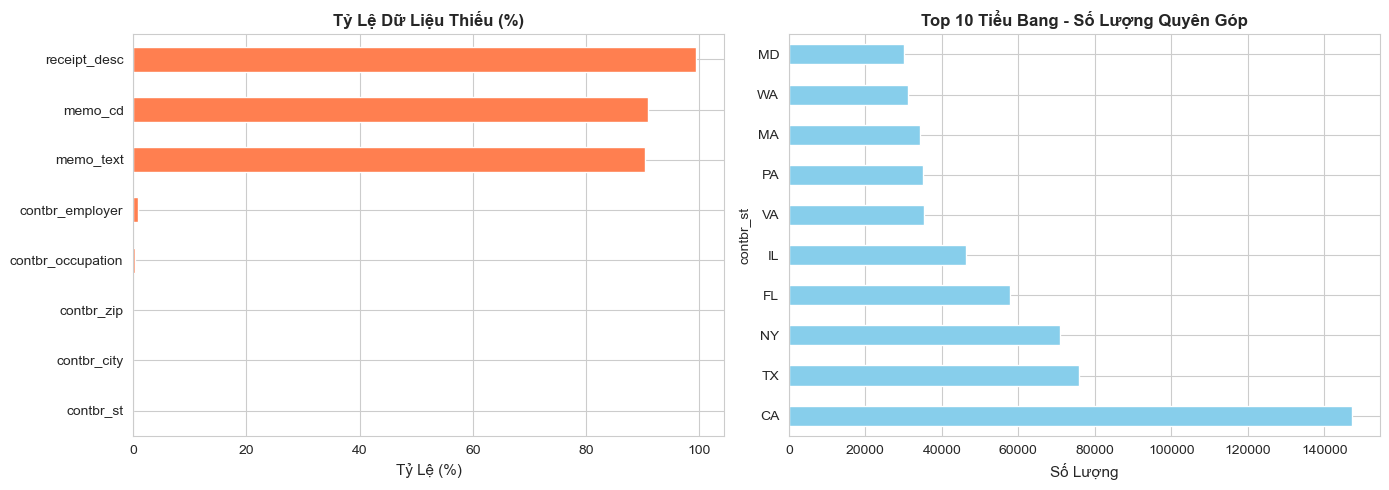

✓ Biểu đồ dữ liệu thiếu được hiển thị


In [14]:
# Biểu đồ phân bố dữ liệu thiếu
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ 1: Dữ liệu thiếu
missing_pct = (fec.isnull().sum() / len(fec) * 100).sort_values(ascending=True)
missing_pct = missing_pct[missing_pct > 0]
missing_pct.plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Tỷ Lệ Dữ Liệu Thiếu (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tỷ Lệ (%)', fontsize=11)

# Biểu đồ 2: Top tiểu bang
top_states = fec['contbr_st'].value_counts().head(10)
top_states.plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Top 10 Tiểu Bang - Số Lượng Quyên Góp', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Số Lượng', fontsize=11)

plt.tight_layout()
plt.show()
print("✓ Biểu đồ dữ liệu thiếu được hiển thị")

### 2.2 Phân tích Occupation (Nguồn Công Việc) - Referrer

In [15]:
print("=" * 80)
print("NGUỒN CÔNG VIỆC PHỔ BIẾN NHẤT (TOP 20)")
print("=" * 80)

top_occupations = fec['contbr_occupation'].value_counts().head(20)
print(top_occupations)
print(f"\nTổng số occupation khác nhau: {fec['contbr_occupation'].nunique()}")

NGUỒN CÔNG VIỆC PHỔ BIẾN NHẤT (TOP 20)
contbr_occupation
RETIRED          233990
NOT PROVIDED      57151
ATTORNEY          34286
HOMEMAKER         29931
PHYSICIAN         23432
ENGINEER          14334
TEACHER           13990
CONSULTANT        13273
PROFESSOR         12555
NOT EMPLOYED       9828
SALES              8333
LAWYER             8283
MANAGER            8024
PRESIDENT          7758
STUDENT            7071
CEO                6526
OWNER              6343
EXECUTIVE          5506
SELF-EMPLOYED      5472
WRITER             5128
Name: count, dtype: int64

Tổng số occupation khác nhau: 45064


In [16]:
# Tính số tiền quyên góp theo occupation
occ_amount = fec.groupby('contbr_occupation')['contb_receipt_amt'].agg([
    ('Số Lượt', 'count'),
    ('Tổng Tiền', 'sum'),
    ('Trung Bình', 'mean')
]).sort_values('Tổng Tiền', ascending=False)

print("\n" + "=" * 80)
print("TOP 15 OCCUPATION - TỔNG TIỀN QUYÊN GÓP")
print("=" * 80)
print(occ_amount.head(15))


TOP 15 OCCUPATION - TỔNG TIỀN QUYÊN GÓP
                   Số Lượt    Tổng Tiền   Trung Bình
contbr_occupation                                   
RETIRED             233990  48866360.87   208.839527
NOT PROVIDED         57151  25432446.97   445.004409
ATTORNEY             34286  18619177.40   543.054815
HOMEMAKER            29931  17883151.58   597.479255
PHYSICIAN            23432   7329445.18   312.796397
PRESIDENT             7758   6599433.71   850.661731
CEO                   6526   6286015.31   963.226373
EXECUTIVE             5506   5494011.14   997.822583
CONSULTANT           13273   5004638.16   377.054031
LAWYER                8283   3551703.19   428.794300
OWNER                 6343   3409854.28   537.577531
INVESTOR              2708   3315901.92  1224.483722
ENGINEER             14334   2769899.25   193.239797
PROFESSOR            12555   2461773.81   196.079157
SELF-EMPLOYED         5472   2312645.94   422.632664


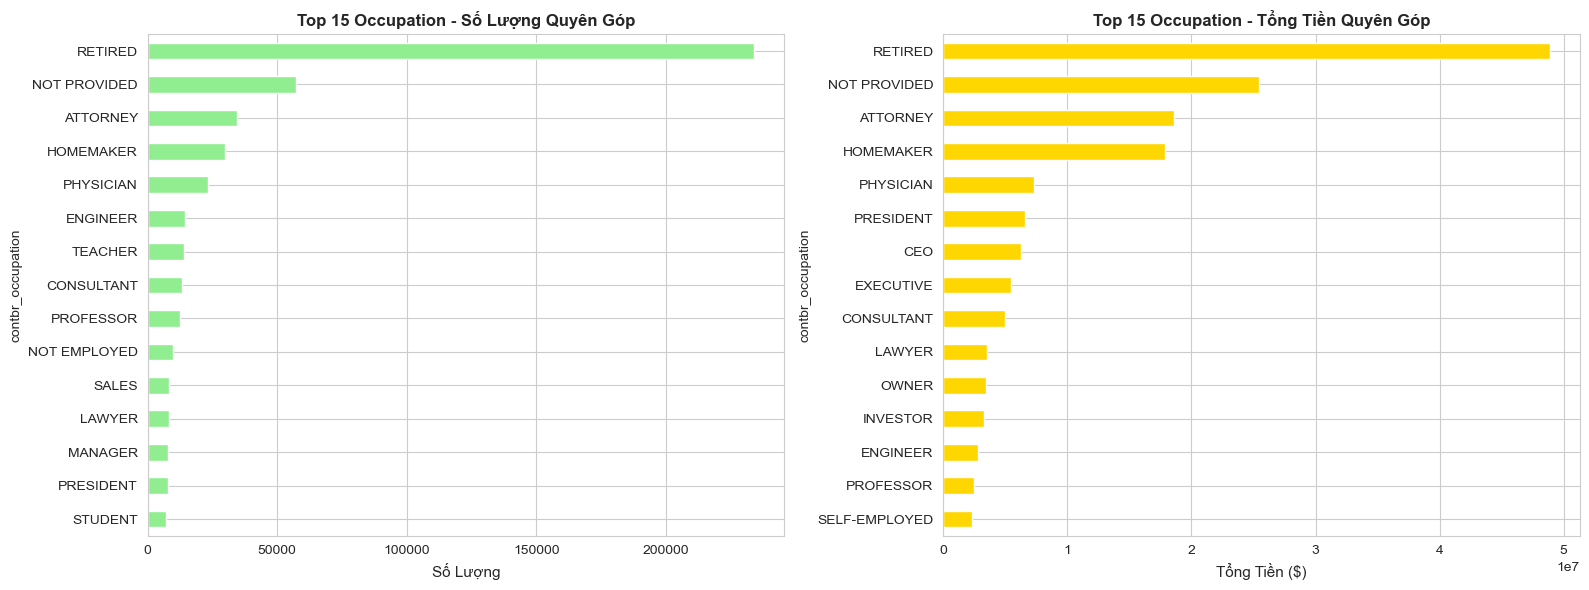

✓ Biểu đồ Occupation được hiển thị


In [17]:
# Biểu đồ Top Occupation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 occupation theo số lượt
top_occ_count = fec['contbr_occupation'].value_counts().head(15)
top_occ_count.plot(kind='barh', ax=axes[0], color='lightgreen')
axes[0].set_title('Top 15 Occupation - Số Lượng Quyên Góp', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Số Lượng', fontsize=11)
axes[0].invert_yaxis()

# Top 15 occupation theo tổng tiền
top_occ_money = occ_amount['Tổng Tiền'].head(15)
top_occ_money.plot(kind='barh', ax=axes[1], color='gold')
axes[1].set_title('Top 15 Occupation - Tổng Tiền Quyên Góp', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tổng Tiền ($)', fontsize=11)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
print("✓ Biểu đồ Occupation được hiển thị")

---
## **PHẦN 3: PHÂN TÍCH TƯƠNG QUAN (CORRELATION ANALYSIS)**

### 3.1 Phân tích Occupation theo Đảng Phái

In [18]:
print("=" * 80)
print("PHÂN TÍCH TƯƠNG QUAN: OCCUPATION - ĐẢO PHÁI")
print("=" * 80)

# Tạo bảng pivot cho các occupation có trên 2 triệu đô
by_occupation = fec.pivot_table('contb_receipt_amt',
                                 index='contbr_occupation',
                                 columns='party',
                                 aggfunc='sum')

over_2mm = by_occupation[by_occupation.sum(axis='columns') > 2000000]
print(f"\nOccupation có tổng quyên góp > $2,000,000:")
print(over_2mm.sort_values('Democrat', ascending=False))

PHÂN TÍCH TƯƠNG QUAN: OCCUPATION - ĐẢO PHÁI

Occupation có tổng quyên góp > $2,000,000:
party                 Democrat   Republican
contbr_occupation                          
RETIRED            25305116.38  23561244.49
ATTORNEY           11141982.97   7477194.43
NOT PROVIDED        4866973.96  20565473.01
HOMEMAKER           4248875.80  13634275.78
PHYSICIAN           3735124.94   3594320.24
LAWYER              3160478.87    391224.32
CONSULTANT          2459912.71   2544725.45
PROFESSOR           2165071.08    296702.73
CEO                 2074974.79   4211040.52
PRESIDENT           1878509.95   4720923.76
EXECUTIVE           1355161.05   4138850.09
OWNER               1001567.36   2408286.92
ENGINEER             951525.55   1818373.70
INVESTOR             884133.00   2431768.92
MANAGER              762883.22   1444532.37
SELF-EMPLOYED        672393.40   1640252.54
REAL ESTATE          528902.09   1625902.25


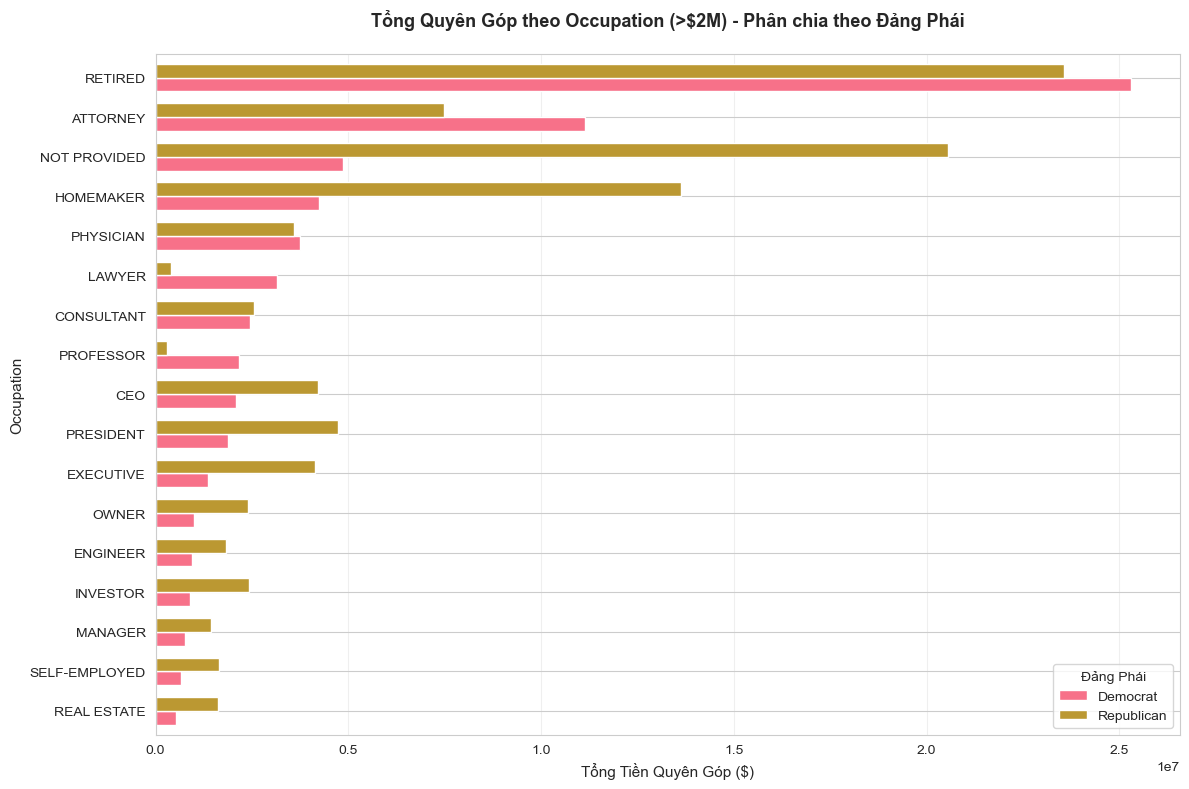

✓ Biểu đồ Occupation-Party được hiển thị


In [19]:
# Biểu đồ Occupation theo Đảng Phái
fig, ax = plt.subplots(figsize=(12, 8))
over_2mm.sort_values('Democrat', ascending=True).plot(kind='barh', ax=ax, width=0.7)
plt.title('Tổng Quyên Góp theo Occupation (>$2M) - Phân chia theo Đảng Phái', 
          fontsize=13, fontweight='bold', pad=20)
plt.xlabel('Tổng Tiền Quyên Góp ($)', fontsize=11)
plt.ylabel('Occupation', fontsize=11)
plt.legend(title='Đảng Phái', fontsize=10)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
print("✓ Biểu đồ Occupation-Party được hiển thị")

### 3.2 Phân tích Employer theo Ứng Viên Chính

In [20]:
def get_top_amounts(group, key, n=10):
    """Hàm trả về top N tổng tiền quyên góp theo key"""
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

# Nhóm theo tên ứng viên
grouped = fec_mrbo.groupby('cand_nm')

print("=" * 80)
print("TOP 7 OCCUPATION - OBAMA VS ROMNEY")
print("=" * 80)
print(grouped.apply(get_top_amounts, 'contbr_occupation', n=7))

TOP 7 OCCUPATION - OBAMA VS ROMNEY
cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
              

In [21]:
print("\n" + "=" * 80)
print("TOP 10 EMPLOYER - OBAMA VS ROMNEY")
print("=" * 80)
print(grouped.apply(get_top_amounts, 'contbr_employer', n=10))


TOP 10 EMPLOYER - OBAMA VS ROMNEY
cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
              

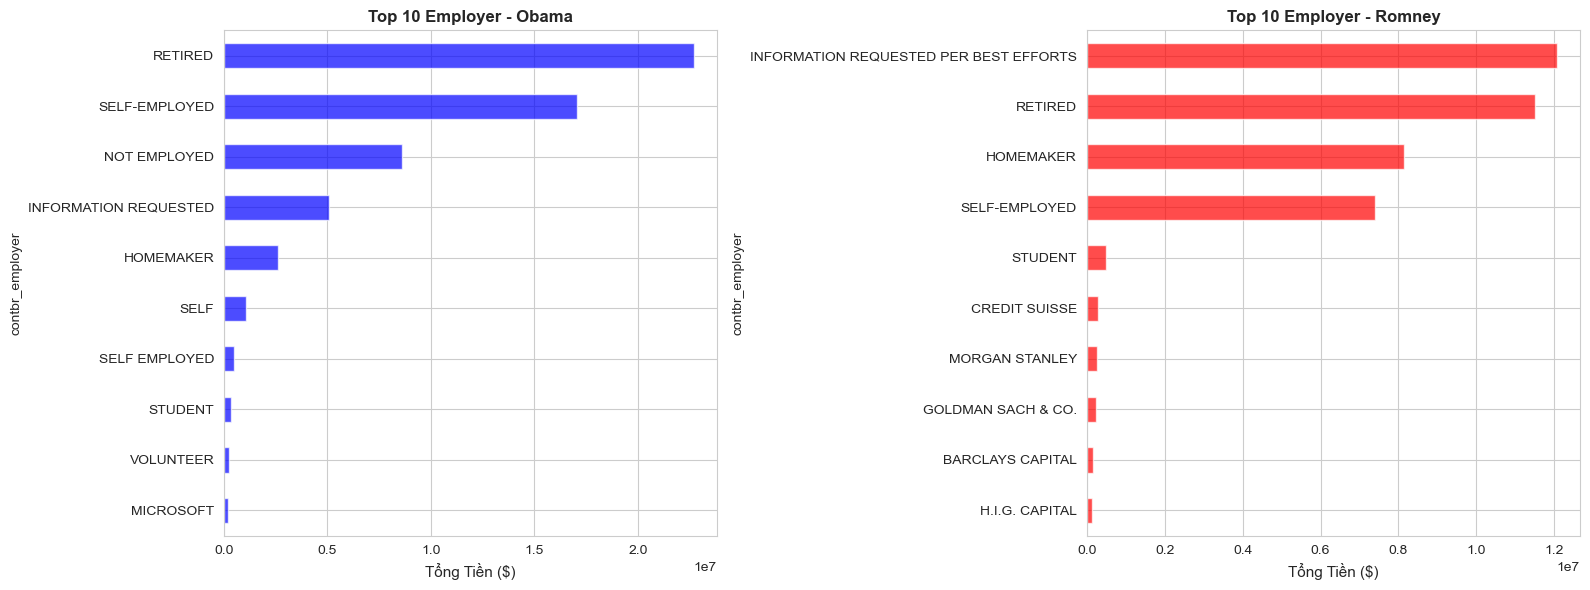

✓ Biểu đồ Employer được hiển thị


In [22]:
# Biểu đồ Employer
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top Employer cho Obama
obama_employers = fec_mrbo[fec_mrbo['cand_nm'] == 'Obama, Barack'].groupby('contbr_employer')['contb_receipt_amt'].sum().nlargest(10)
obama_employers.plot(kind='barh', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Top 10 Employer - Obama', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tổng Tiền ($)', fontsize=11)
axes[0].invert_yaxis()

# Top Employer cho Romney
romney_employers = fec_mrbo[fec_mrbo['cand_nm'] == 'Romney, Mitt'].groupby('contbr_employer')['contb_receipt_amt'].sum().nlargest(10)
romney_employers.plot(kind='barh', ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('Top 10 Employer - Romney', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tổng Tiền ($)', fontsize=11)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
print("✓ Biểu đồ Employer được hiển thị")

### 3.3 Phân tích Địa Lý (Geographic Analysis)

In [23]:
print("=" * 80)
print("PHÂN TÍCH ĐỊA LÝ: TIỂU BANG CÓ QUYÊN GÓP CAO NHẤT")
print("=" * 80)

# Tổng quyên góp theo tiểu bang
state_totals = fec.groupby('contbr_st')['contb_receipt_amt'].agg([
    ('Số Lượt', 'count'),
    ('Tổng Tiền', 'sum'),
    ('Trung Bình', 'mean')
]).sort_values('Tổng Tiền', ascending=False)

print("\nTop 15 tiểu bang:")
print(state_totals.head(15))

PHÂN TÍCH ĐỊA LÝ: TIỂU BANG CÓ QUYÊN GÓP CAO NHẤT

Top 15 tiểu bang:
           Số Lượt    Tổng Tiền  Trung Bình
contbr_st                                  
CA          147188  44592230.31  302.961045
TX           75966  32378640.65  426.225425
NY           70913  28229139.82  398.081308
IL           46336  22669239.64  489.236007
FL           57822  21793674.46  376.909731
MA           34152  12365222.71  362.064380
VA           35264  10024492.58  284.269867
PA           35146   8755949.19  249.130746
GA           28053   8033289.89  286.361170
NJ           26014   7873147.98  302.650418
MD           30071   7550066.65  251.074678
WA           31242   7093768.81  227.058729
CT           16150   6460042.54  400.002634
MI           25040   6366459.23  254.251567
DC           13269   5739788.37  432.571284


In [24]:
# Phân tích Obama vs Romney theo tiểu bang
print("\n" + "=" * 80)
print("PHÂN TÍCH OBAMA VS ROMNEY THEO TIỂU BANG")
print("=" * 80)

grouped_state = fec_mrbo.groupby(["cand_nm", "contbr_st"])
state_totals_cand = grouped_state["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
state_totals_cand = state_totals_cand[state_totals_cand.sum(axis="columns") > 100000]

print(f"\nTiểu bang có tổng quyên góp > $100,000:")
print(state_totals_cand.sort_values('Obama, Barack', ascending=False).head(15))


PHÂN TÍCH OBAMA VS ROMNEY THEO TIỂU BANG

Tiểu bang có tổng quyên góp > $100,000:
cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
CA           23824984.24   11237636.60
IL           16443895.84    3628571.53
NY           14651918.51   10184212.63
FL            7318178.58    8338458.81
MA            6649015.25    4710542.30
TX            6570832.45    6221989.68
MD            4832663.93    1633690.40
DC            4373538.80    1025137.50
VA            4259977.19    3465765.85
WA            4250933.16    1341521.56
PA            3713426.98    1941519.43
NJ            3203257.93    3333320.20
GA            2786399.49    1995725.59
MI            2570307.25    2448109.87
NC            2357067.63    1273603.92


In [25]:
# Tính tỷ lệ phần trăm quyên góp
percent = state_totals_cand.div(state_totals_cand.sum(axis="columns"), axis="index")

print("\n" + "=" * 80)
print("TỶ LỆ PHẦN TRĂM QUYÊN GÓP THEO TIỂU BANG")
print("=" * 80)
print(percent.head(15))


TỶ LỆ PHẦN TRĂM QUYÊN GÓP THEO TIỂU BANG
cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583
GA              0.582670      0.417330
HI              0.876774      0.123226
IA              0.737149      0.262851
ID              0.200608      0.799392
IL              0.819226      0.180774


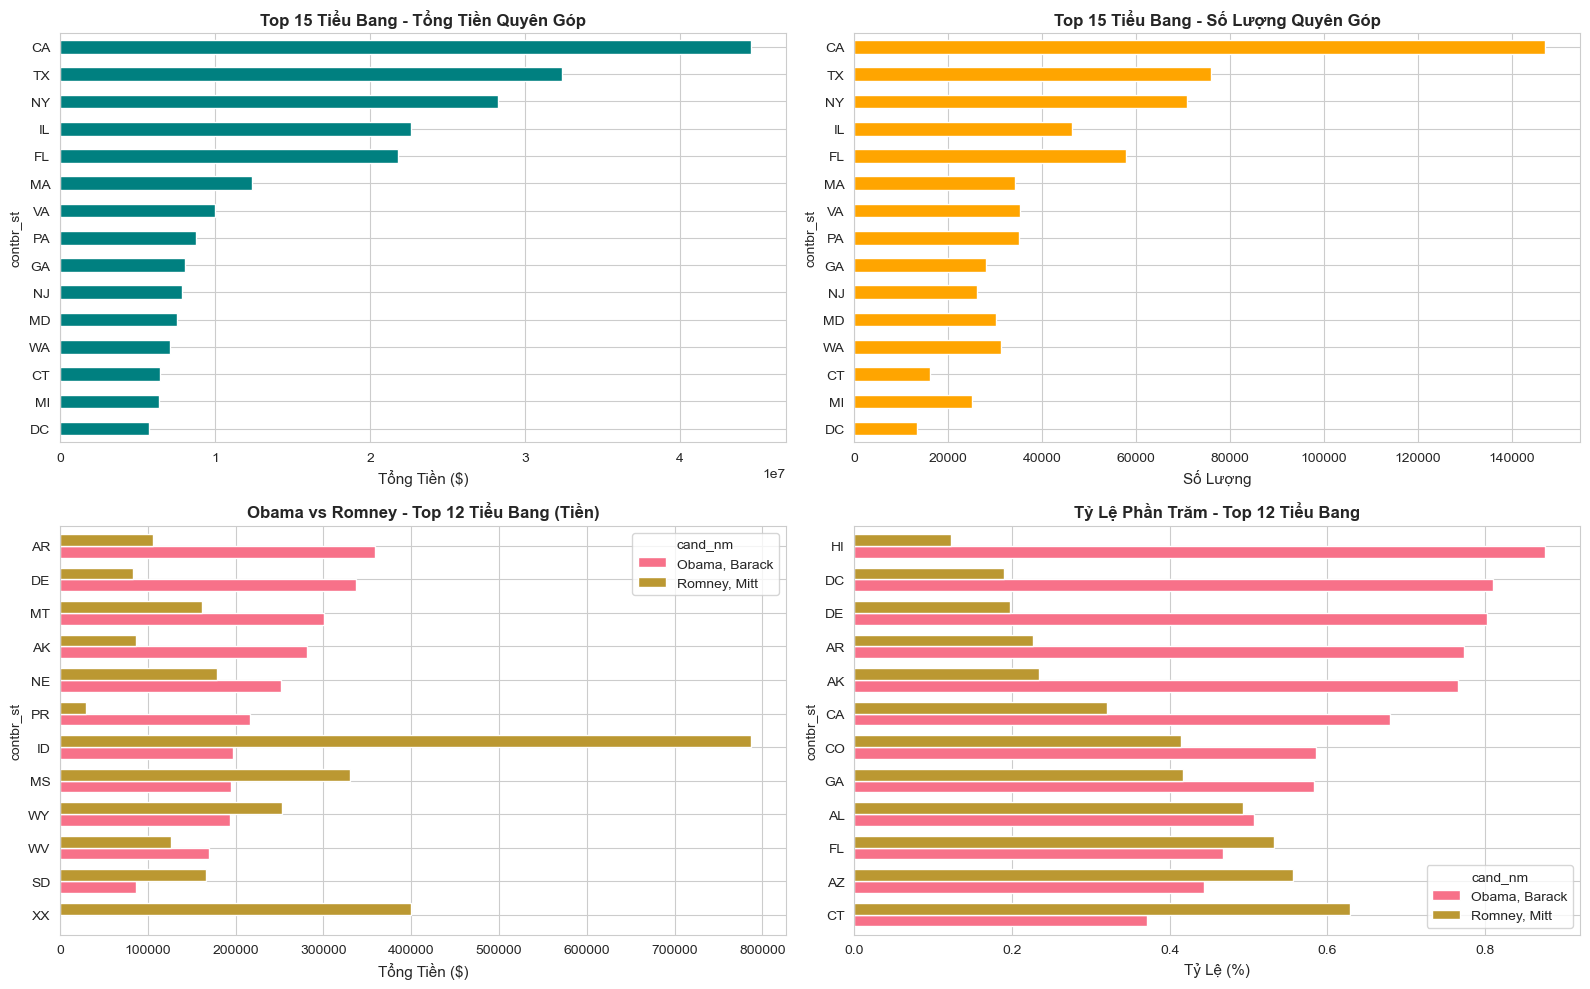

✓ Biểu đồ địa lý được hiển thị


In [26]:
# Biểu đồ địa lý
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Biểu đồ 1: Top tiểu bang theo tổng tiền
top_states_money = state_totals['Tổng Tiền'].head(15)
top_states_money.plot(kind='barh', ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Top 15 Tiểu Bang - Tổng Tiền Quyên Góp', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tổng Tiền ($)', fontsize=11)
axes[0, 0].invert_yaxis()

# Biểu đồ 2: Top tiểu bang theo số lượng
top_states_count = state_totals['Số Lượt'].head(15)
top_states_count.plot(kind='barh', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Top 15 Tiểu Bang - Số Lượng Quyên Góp', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Số Lượng', fontsize=11)
axes[0, 1].invert_yaxis()

# Biểu đồ 3: Obama vs Romney theo tiểu bang
state_totals_cand_top = state_totals_cand.sort_values('Obama, Barack', ascending=True).head(12)
state_totals_cand_top.plot(kind='barh', ax=axes[1, 0], width=0.7)
axes[1, 0].set_title('Obama vs Romney - Top 12 Tiểu Bang (Tiền)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tổng Tiền ($)', fontsize=11)

# Biểu đồ 4: Tỷ lệ phần trăm
percent_top = percent.head(12).sort_values('Obama, Barack', ascending=True)
percent_top.plot(kind='barh', ax=axes[1, 1], width=0.7, stacked=False)
axes[1, 1].set_title('Tỷ Lệ Phần Trăm - Top 12 Tiểu Bang', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tỷ Lệ (%)', fontsize=11)

plt.tight_layout()
plt.show()
print("✓ Biểu đồ địa lý được hiển thị")

---
## **PHẦN 4: PHÂN TÍCH PHÂN NHÓM (BUCKETING) THEO GIÁ TRỊ**

In [27]:
print("=" * 80)
print("PHÂN NHÓM KHOẢN QUYÊN GÓP THEO GIÁ TRỊ")
print("=" * 80)

# Tạo các bins cho giá trị quyên góp
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])
labels_bin = pd.cut(fec_mrbo["contb_receipt_amt"], bins)

print("\nCác nhóm giá trị quyên góp:")
print(labels_bin.value_counts().sort_index())

PHÂN NHÓM KHOẢN QUYÊN GÓP THEO GIÁ TRỊ

Các nhóm giá trị quyên góp:
contb_receipt_amt
(0, 1]                    570
(1, 10]                 43751
(10, 100]              404133
(100, 1000]            197348
(1000, 10000]           48470
(10000, 100000]             3
(100000, 1000000]           3
(1000000, 10000000]         4
Name: count, dtype: int64


In [28]:
# Tạo bảng tần suất theo ứng viên
grouped_bins = fec_mrbo.groupby(["cand_nm", labels_bin])
bucket_counts = grouped_bins.size().unstack(level=0)

print("\n" + "=" * 80)
print("TẦN SUẤT QUYÊN GÓP THEO NHÓM GIÁ TRỊ")
print("=" * 80)
print(bucket_counts)


TẦN SUẤT QUYÊN GÓP THEO NHÓM GIÁ TRỊ
cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                         493            77
(1, 10]                      40070          3681
(10, 100]                   372280         31853
(100, 1000]                 153991         43357
(1000, 10000]                22284         26186
(10000, 100000]                  2             1
(100000, 1000000]                3             0
(1000000, 10000000]              4             0


In [29]:
# Tính tổng tiền quyên góp theo nhóm
bucket_sums = grouped_bins["contb_receipt_amt"].sum().unstack(level=0)

print("\n" + "=" * 80)
print("TỔNG TIỀN QUYÊN GÓP THEO NHÓM GIÁ TRỊ")
print("=" * 80)
print(bucket_sums)


TỔNG TIỀN QUYÊN GÓP THEO NHÓM GIÁ TRỊ
cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08          0.00
(1000000, 10000000]     7148839.76          0.00


In [30]:
# Chuẩn hóa theo tỷ lệ phần trăm
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index")

print("\n" + "=" * 80)
print("TỶ LỆ PHẦN TRĂM TIỀN QUYÊN GÓP THEO NHÓM GIÁ TRỊ")
print("=" * 80)
print(normed_sums)


TỶ LỆ PHẦN TRĂM TIỀN QUYÊN GÓP THEO NHÓM GIÁ TRỊ
cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000      0.000000
(1000000, 10000000]       1.000000      0.000000


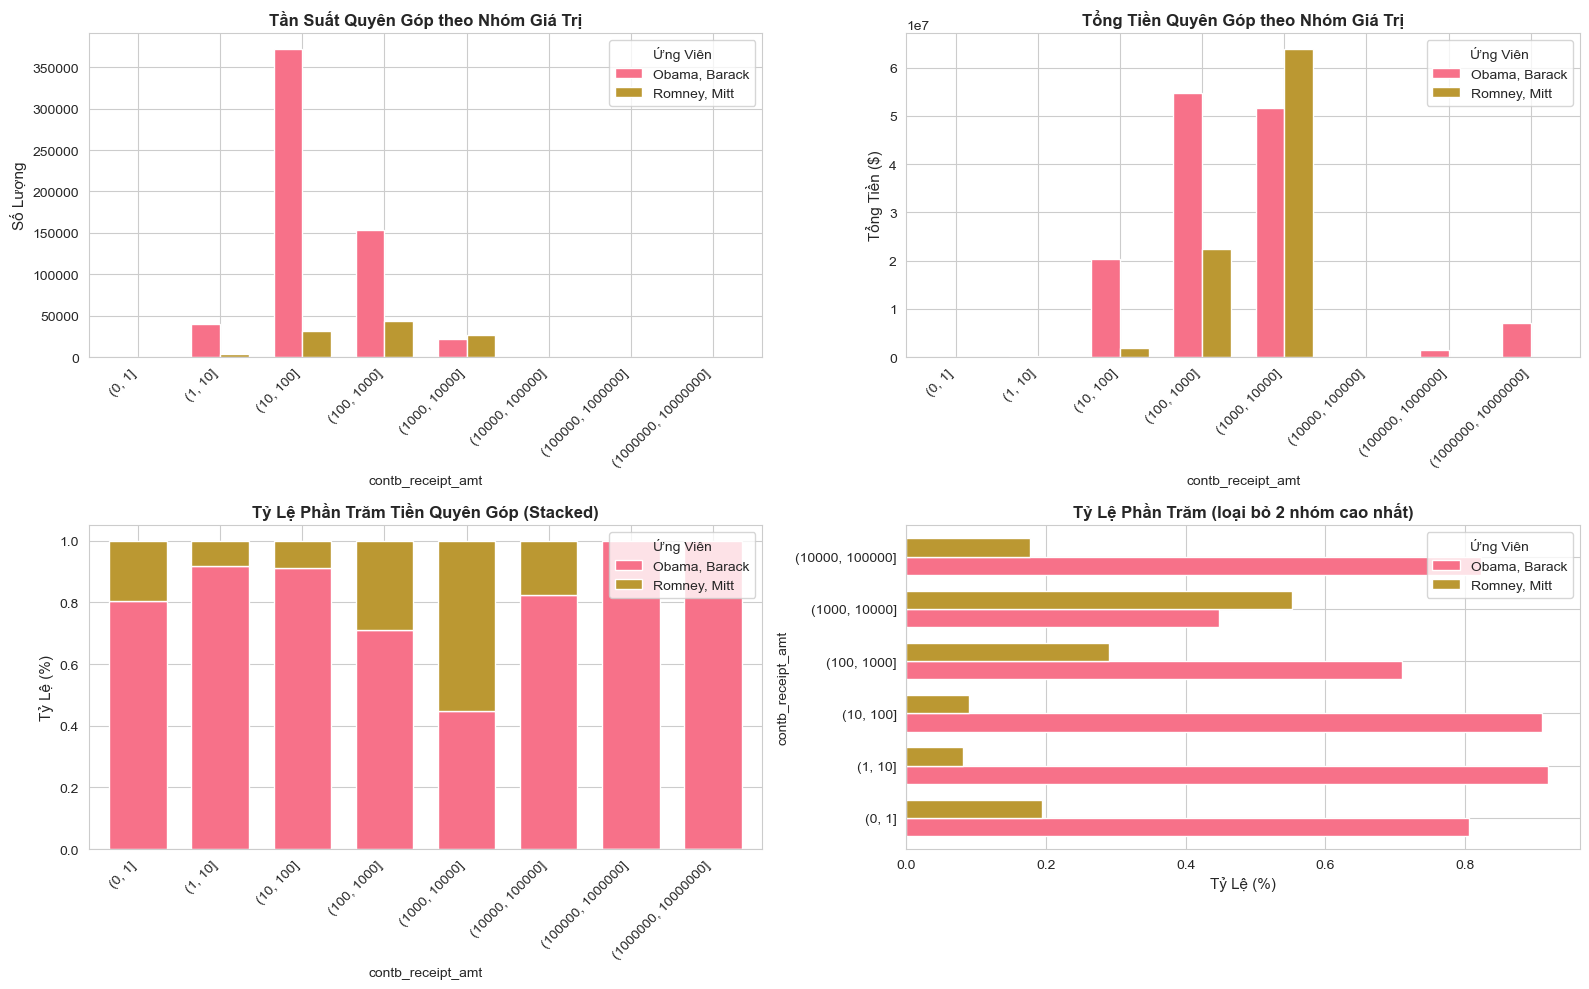

✓ Biểu đồ phân nhóm được hiển thị


In [31]:
# Biểu đồ phân tích phân nhóm
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Biểu đồ 1: Tần suất
bucket_counts.plot(kind='bar', ax=axes[0, 0], width=0.7)
axes[0, 0].set_title('Tần Suất Quyên Góp theo Nhóm Giá Trị', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Số Lượng', fontsize=11)
axes[0, 0].legend(title='Ứng Viên', fontsize=10)
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Biểu đồ 2: Tổng tiền
bucket_sums.plot(kind='bar', ax=axes[0, 1], width=0.7)
axes[0, 1].set_title('Tổng Tiền Quyên Góp theo Nhóm Giá Trị', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Tổng Tiền ($)', fontsize=11)
axes[0, 1].legend(title='Ứng Viên', fontsize=10)
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Biểu đồ 3: Tỷ lệ phần trăm (full)
normed_sums.plot(kind='bar', ax=axes[1, 0], stacked=True, width=0.7)
axes[1, 0].set_title('Tỷ Lệ Phần Trăm Tiền Quyên Góp (Stacked)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Tỷ Lệ (%)', fontsize=11)
axes[1, 0].legend(title='Ứng Viên', fontsize=10)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Biểu đồ 4: Tỷ lệ phần trăm (loại bỏ 2 nhóm lớn)
normed_sums[:-2].plot(kind='barh', ax=axes[1, 1], width=0.7)
axes[1, 1].set_title('Tỷ Lệ Phần Trăm (loại bỏ 2 nhóm cao nhất)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tỷ Lệ (%)', fontsize=11)
axes[1, 1].legend(title='Ứng Viên', fontsize=10)

plt.tight_layout()
plt.show()
print("✓ Biểu đồ phân nhóm được hiển thị")

---
## **PHẦN 5: PHÂN TÍCH THỐNG KÊ CHI TIẾT**

In [32]:
print("=" * 80)
print("THỐNG KÊ MÔ TẢ - TỔNG TIỀN QUYÊN GÓP")
print("=" * 80)

print("\nThống kê toàn bộ dữ liệu:")
print(fec['contb_receipt_amt'].describe())

print("\n" + "-" * 80)
print("Thống kê cho Obama:")
print(fec[fec['cand_nm'] == 'Obama, Barack']['contb_receipt_amt'].describe())

print("\n" + "-" * 80)
print("Thống kê cho Romney:")
print(fec[fec['cand_nm'] == 'Romney, Mitt']['contb_receipt_amt'].describe())

THỐNG KÊ MÔ TẢ - TỔNG TIỀN QUYÊN GÓP

Thống kê toàn bộ dữ liệu:
count    9.914750e+05
mean     3.121928e+02
std      3.764483e+03
min      1.000000e-02
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

--------------------------------------------------------------------------------
Thống kê cho Obama:
count    5.891270e+05
mean     2.306420e+02
std      4.841491e+03
min      1.000000e-02
25%      2.500000e+01
50%      6.000000e+01
75%      2.000000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

--------------------------------------------------------------------------------
Thống kê cho Romney:
count    105155.000000
mean        840.054277
std        1001.537767
min           1.000000
25%         100.000000
50%         250.000000
75%        1000.000000
max       12700.000000
Name: contb_receipt_amt, dtype: float64


In [33]:
print("\n" + "=" * 80)
print("PHÂN TÍCH SỐ LƯỢNG QUYÊN GÓP")
print("=" * 80)

contrib_stats = fec.groupby('cand_nm')['contb_receipt_amt'].agg([
    ('Số Lượng', 'count'),
    ('Tổng Tiền', 'sum'),
    ('Trung Bình', 'mean'),
    ('Trung Vị', 'median'),
    ('Min', 'min'),
    ('Max', 'max')
]).sort_values('Tổng Tiền', ascending=False)

print(contrib_stats)


PHÂN TÍCH SỐ LƯỢNG QUYÊN GÓP
                                Số Lượng     Tổng Tiền   Trung Bình  Trung Vị  \
cand_nm                                                                         
Obama, Barack                     589127  1.358774e+08   230.641996      60.0   
Romney, Mitt                      105155  8.833591e+07   840.054277     250.0   
Paul, Ron                         143161  2.100962e+07   146.755191     100.0   
Perry, Rick                        12709  2.030575e+07  1597.746007    1500.0   
Gingrich, Newt                     46883  1.283277e+07   273.719039     100.0   
Santorum, Rick                     46245  1.104316e+07   238.796828     100.0   
Cain, Herman                       20052  7.101082e+06   354.133348     250.0   
Pawlenty, Timothy                   3844  6.004819e+06  1562.127856    1000.0   
Huntsman, Jon                       4066  3.330373e+06   819.078574     300.0   
Bachmann, Michelle                 13082  2.711439e+06   207.264890     100.0  

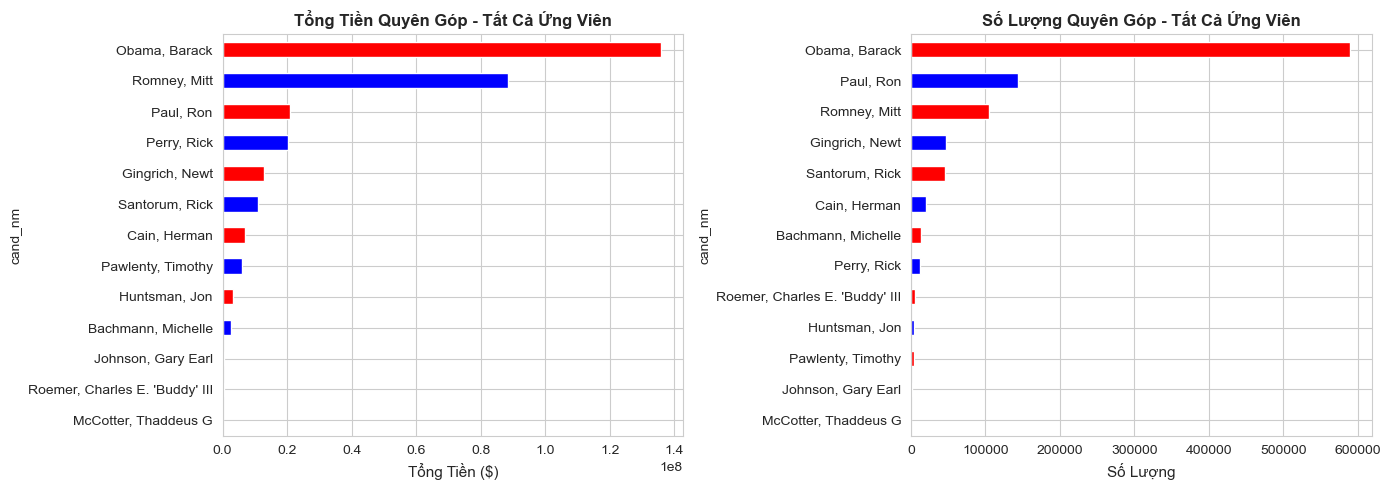

✓ Biểu đồ thống kê được hiển thị


In [34]:
# Biểu đồ thống kê
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ 1: Phân bố tổng tiền
data_plot = contrib_stats['Tổng Tiền'].sort_values(ascending=True)
data_plot.plot(kind='barh', ax=axes[0], color=['red', 'blue'])
axes[0].set_title('Tổng Tiền Quyên Góp - Tất Cả Ứng Viên', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tổng Tiền ($)', fontsize=11)

# Biểu đồ 2: Phân bố số lượng
data_count = contrib_stats['Số Lượng'].sort_values(ascending=True)
data_count.plot(kind='barh', ax=axes[1], color=['red', 'blue'])
axes[1].set_title('Số Lượng Quyên Góp - Tất Cả Ứng Viên', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Số Lượng', fontsize=11)

plt.tight_layout()
plt.show()
print("✓ Biểu đồ thống kê được hiển thị")

---
## **PHẦN 6: TÓM TẮT & KẾT LUẬN**

In [35]:
print("\n" + "=" * 90)
print("KẾT LUẬN VÀ TÓM TẮT PHÂN TÍCH DỮ LIỆU FEC 2012")
print("=" * 90)

summary = f"""
📊 SỐ LIỆU CHUNG:
  • Tổng số records quyên góp: {len(fec):,}
  • Tổng số records (Obama + Romney): {len(fec_mrbo):,}
  • Số ứng viên: {fec['cand_nm'].nunique()}
  • Số occupation khác nhau: {fec['contbr_occupation'].nunique()}
  • Số tiểu bang/vùng: {fec['contbr_st'].nunique()}

💰 PHÂN TÍCH TỔNG TIỀN:
  • Tổng tiền toàn bộ: ${fec['contb_receipt_amt'].sum():,.0f}
  • Tổng tiền Obama: ${fec[fec['cand_nm'] == 'Obama, Barack']['contb_receipt_amt'].sum():,.0f}
  • Tổng tiền Romney: ${fec[fec['cand_nm'] == 'Romney, Mitt']['contb_receipt_amt'].sum():,.0f}
  • Trung bình quyên góp: ${fec['contb_receipt_amt'].mean():,.0f}
  • Trung vị quyên góp: ${fec['contb_receipt_amt'].median():,.0f}

👥 PHÂN TÍCH OCCUPATION:
  • Top occupation: {fec['contbr_occupation'].value_counts().index[0]}
  • Tỷ lệ dữ liệu thiếu: {(occ_missing + occ_not_provided) / len(fec) * 100:.2f}%
  • Occupation có quyên góp cao nhất: {over_2mm.sum(axis=1).idxmax()}

🗺️ PHÂN TÍCH ĐỊA LÝ:
  • Tiểu bang hàng đầu: {state_totals.index[0]}
  • Tỷ lệ quyên góp từ Top 5 tiểu bang: {state_totals['Tổng Tiền'].head(5).sum() / state_totals['Tổng Tiền'].sum() * 100:.1f}%

💵 PHÂN TÍCH GIÁ TRỊ QUYÊN GÓP:
  • Phần lớn quyên góp nằm trong nhóm: ($100 - $1,000)
  • Obama nhận được nhiều khoản quyên góp nhỏ hơn Romney
  • Romney nhận được những khoản quyên góp lớn hơn từ nhà tài trợ chính

✅ NHỮNG PHÁT HIỆN CHÍNH:
  ✓ Một số ngành (luật sư, bác sĩ) có xu hướng ủng hộ riêng theo đảng phái
  ✓ Các tiểu bang khác nhau có mô hình quyên góp khác nhau
  ✓ California, Texas, New York dẫn đầu về tổng tiền quyên góp
  ✓ Phân bố quyên góp khác nhau giữa Obama (nhiều khoản nhỏ) và Romney (ít khoản lớn)
"""

print(summary)
print("=" * 90)


KẾT LUẬN VÀ TÓM TẮT PHÂN TÍCH DỮ LIỆU FEC 2012

📊 SỐ LIỆU CHUNG:
  • Tổng số records quyên góp: 991,475
  • Tổng số records (Obama + Romney): 694,282
  • Số ứng viên: 13
  • Số occupation khác nhau: 45064
  • Số tiểu bang/vùng: 73

💰 PHÂN TÍCH TỔNG TIỀN:
  • Tổng tiền toàn bộ: $309,531,353
  • Tổng tiền Obama: $135,877,427
  • Tổng tiền Romney: $88,335,908
  • Trung bình quyên góp: $312
  • Trung vị quyên góp: $100

👥 PHÂN TÍCH OCCUPATION:
  • Top occupation: RETIRED
  • Tỷ lệ dữ liệu thiếu: 6.00%
  • Occupation có quyên góp cao nhất: RETIRED

🗺️ PHÂN TÍCH ĐỊA LÝ:
  • Tiểu bang hàng đầu: CA
  • Tỷ lệ quyên góp từ Top 5 tiểu bang: 48.4%

💵 PHÂN TÍCH GIÁ TRỊ QUYÊN GÓP:
  • Phần lớn quyên góp nằm trong nhóm: ($100 - $1,000)
  • Obama nhận được nhiều khoản quyên góp nhỏ hơn Romney
  • Romney nhận được những khoản quyên góp lớn hơn từ nhà tài trợ chính

✅ NHỮNG PHÁT HIỆN CHÍNH:
  ✓ Một số ngành (luật sư, bác sĩ) có xu hướng ủng hộ riêng theo đảng phái
  ✓ Các tiểu bang khác nhau có mô hình

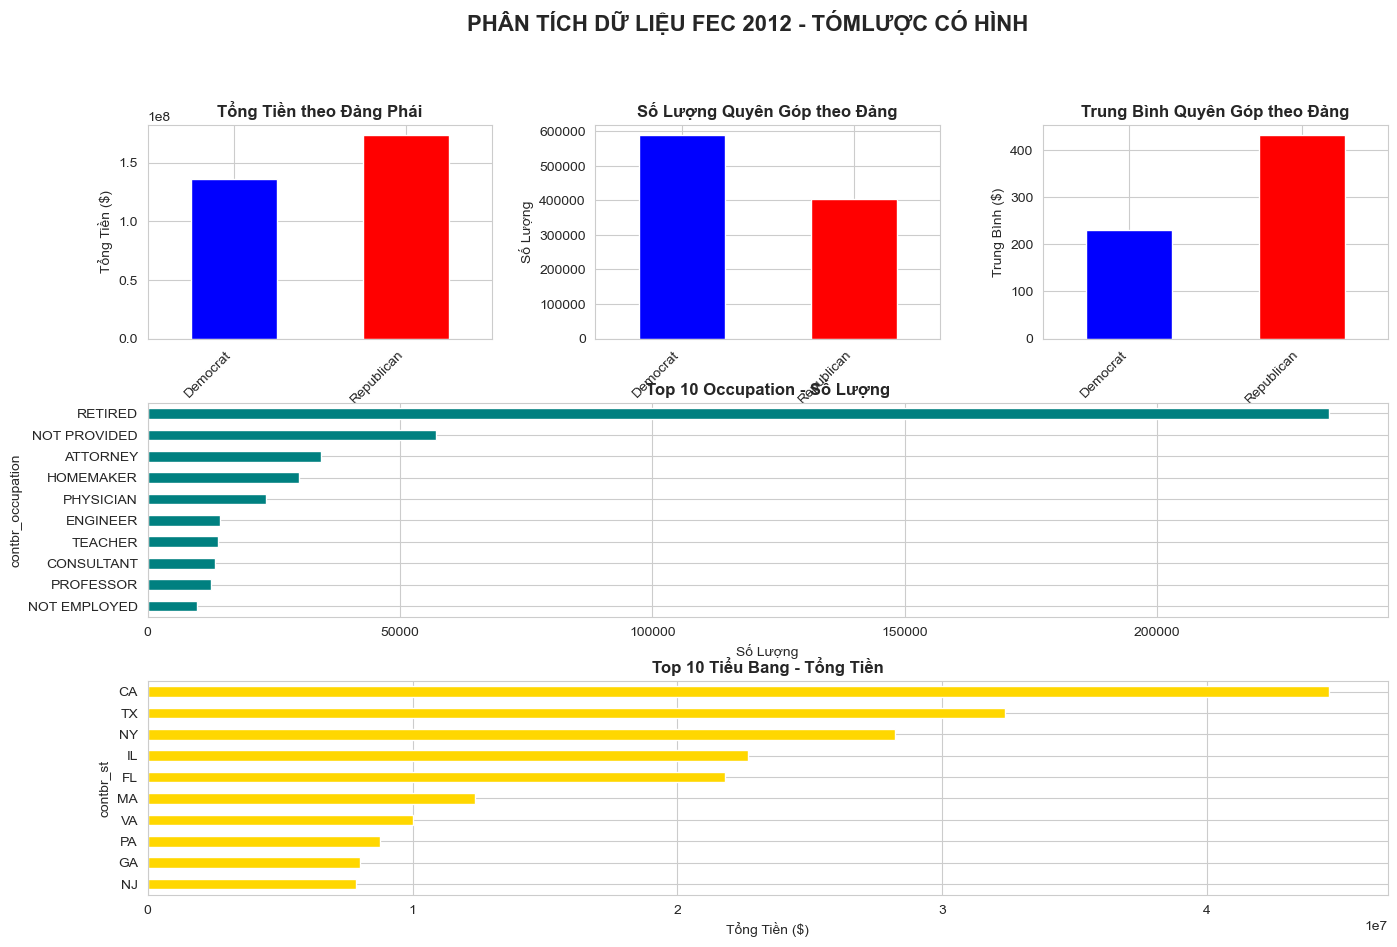

✓ Biểu đồ tóm tắt được hiển thị


In [36]:
# Biểu đồ tóm tắt cuối cùng
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Tổng tiền theo đảng phái
ax1 = fig.add_subplot(gs[0, 0])
party_money = fec.groupby('party')['contb_receipt_amt'].sum()
party_money.plot(kind='bar', ax=ax1, color=['blue', 'red'])
ax1.set_title('Tổng Tiền theo Đảng Phái', fontweight='bold')
ax1.set_ylabel('Tổng Tiền ($)', fontsize=10)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 2. Số lượng quyên góp
ax2 = fig.add_subplot(gs[0, 1])
party_count = fec.groupby('party')['contb_receipt_amt'].count()
party_count.plot(kind='bar', ax=ax2, color=['blue', 'red'])
ax2.set_title('Số Lượng Quyên Góp theo Đảng', fontweight='bold')
ax2.set_ylabel('Số Lượng', fontsize=10)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. Trung bình quyên góp
ax3 = fig.add_subplot(gs[0, 2])
party_avg = fec.groupby('party')['contb_receipt_amt'].mean()
party_avg.plot(kind='bar', ax=ax3, color=['blue', 'red'])
ax3.set_title('Trung Bình Quyên Góp theo Đảng', fontweight='bold')
ax3.set_ylabel('Trung Bình ($)', fontsize=10)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Top 10 Occupation
ax4 = fig.add_subplot(gs[1, :])
top_10_occ = fec['contbr_occupation'].value_counts().head(10)
top_10_occ.plot(kind='barh', ax=ax4, color='teal')
ax4.set_title('Top 10 Occupation - Số Lượng', fontweight='bold')
ax4.set_xlabel('Số Lượng', fontsize=10)
ax4.invert_yaxis()

# 5. Top 10 State
ax5 = fig.add_subplot(gs[2, :])
top_10_state = fec.groupby('contbr_st')['contb_receipt_amt'].sum().nlargest(10)
top_10_state.plot(kind='barh', ax=ax5, color='gold')
ax5.set_title('Top 10 Tiểu Bang - Tổng Tiền', fontweight='bold')
ax5.set_xlabel('Tổng Tiền ($)', fontsize=10)
ax5.invert_yaxis()

fig.suptitle('PHÂN TÍCH DỮ LIỆU FEC 2012 - TÓMLƯỢC CÓ HÌNH', fontsize=16, fontweight='bold', y=0.995)
plt.show()
print("✓ Biểu đồ tóm tắt được hiển thị")